Sub graphs Analysis
===================

In [37]:
import networkx as nx
import random
import pandas as pd
import numpy as np

In [18]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
import matplotlib.patches as mpatches
import matplotlib.lines as lines

legend_properties = {'weight':'bold'}

In [5]:
G = nx.read_gml('../data/prisoners_network.gml')

**Cliques**

A clique, in the social sciences, is a group of individuals who interact with one another and share similar interests.

- Text book: http://oxfordindex.oup.com/view/10.1093/acprof:oso/9780198506263.003.0006
- wikipedia link: https://en.wikipedia.org/wiki/Clique
- networkx: https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.clique.html


In [6]:
size_largest_clique = nx.graph_clique_number(G)
size_largest_clique

21

In [7]:
number_of_cliques = nx.graph_number_of_cliques(G)
number_of_cliques

779

In [8]:
cliques_G = nx.make_max_clique_graph(G)

In [9]:
def max_clique_graph(cliques, min_size=3):
    """ 
    Create the maximal clique graph of a graph with node names
    """
    K = nx.Graph()
    K.name = 'cliques graph'
    for co_authors in list(cliques):
        if len(co_authors) < min_size:
            continue
        K.add_nodes_from(co_authors)
        
        edges = [(a1, a2) for a1 in co_authors for a2 in co_authors if a1 != a2]
        K.add_edges_from(edges)
        
    return K

In [20]:
cliques = nx.find_cliques(G)
Z = max_clique_graph(cliques, 1)

**Sub graphs.**

In [21]:
graphs = list(nx.connected_component_subgraphs(Z))

In [22]:
len(graphs)

529

**Known authors cliques.**

In [24]:
for i, g in enumerate(graphs):
    for k in ['r. axelrod', 'martin a. nowak', 'daniel ashlock', 'joshua b. plotkin', 'matjaz perc']:
        D = g
        if k in D.nodes():
            print(i, k)

11 martin a. nowak
11 matjaz perc
62 daniel ashlock
137 r. axelrod
140 joshua b. plotkin


In [26]:
D = graphs[11]

In [27]:
labels = {}
for i,n in enumerate(D.nodes()):
    labels.update({n : i})

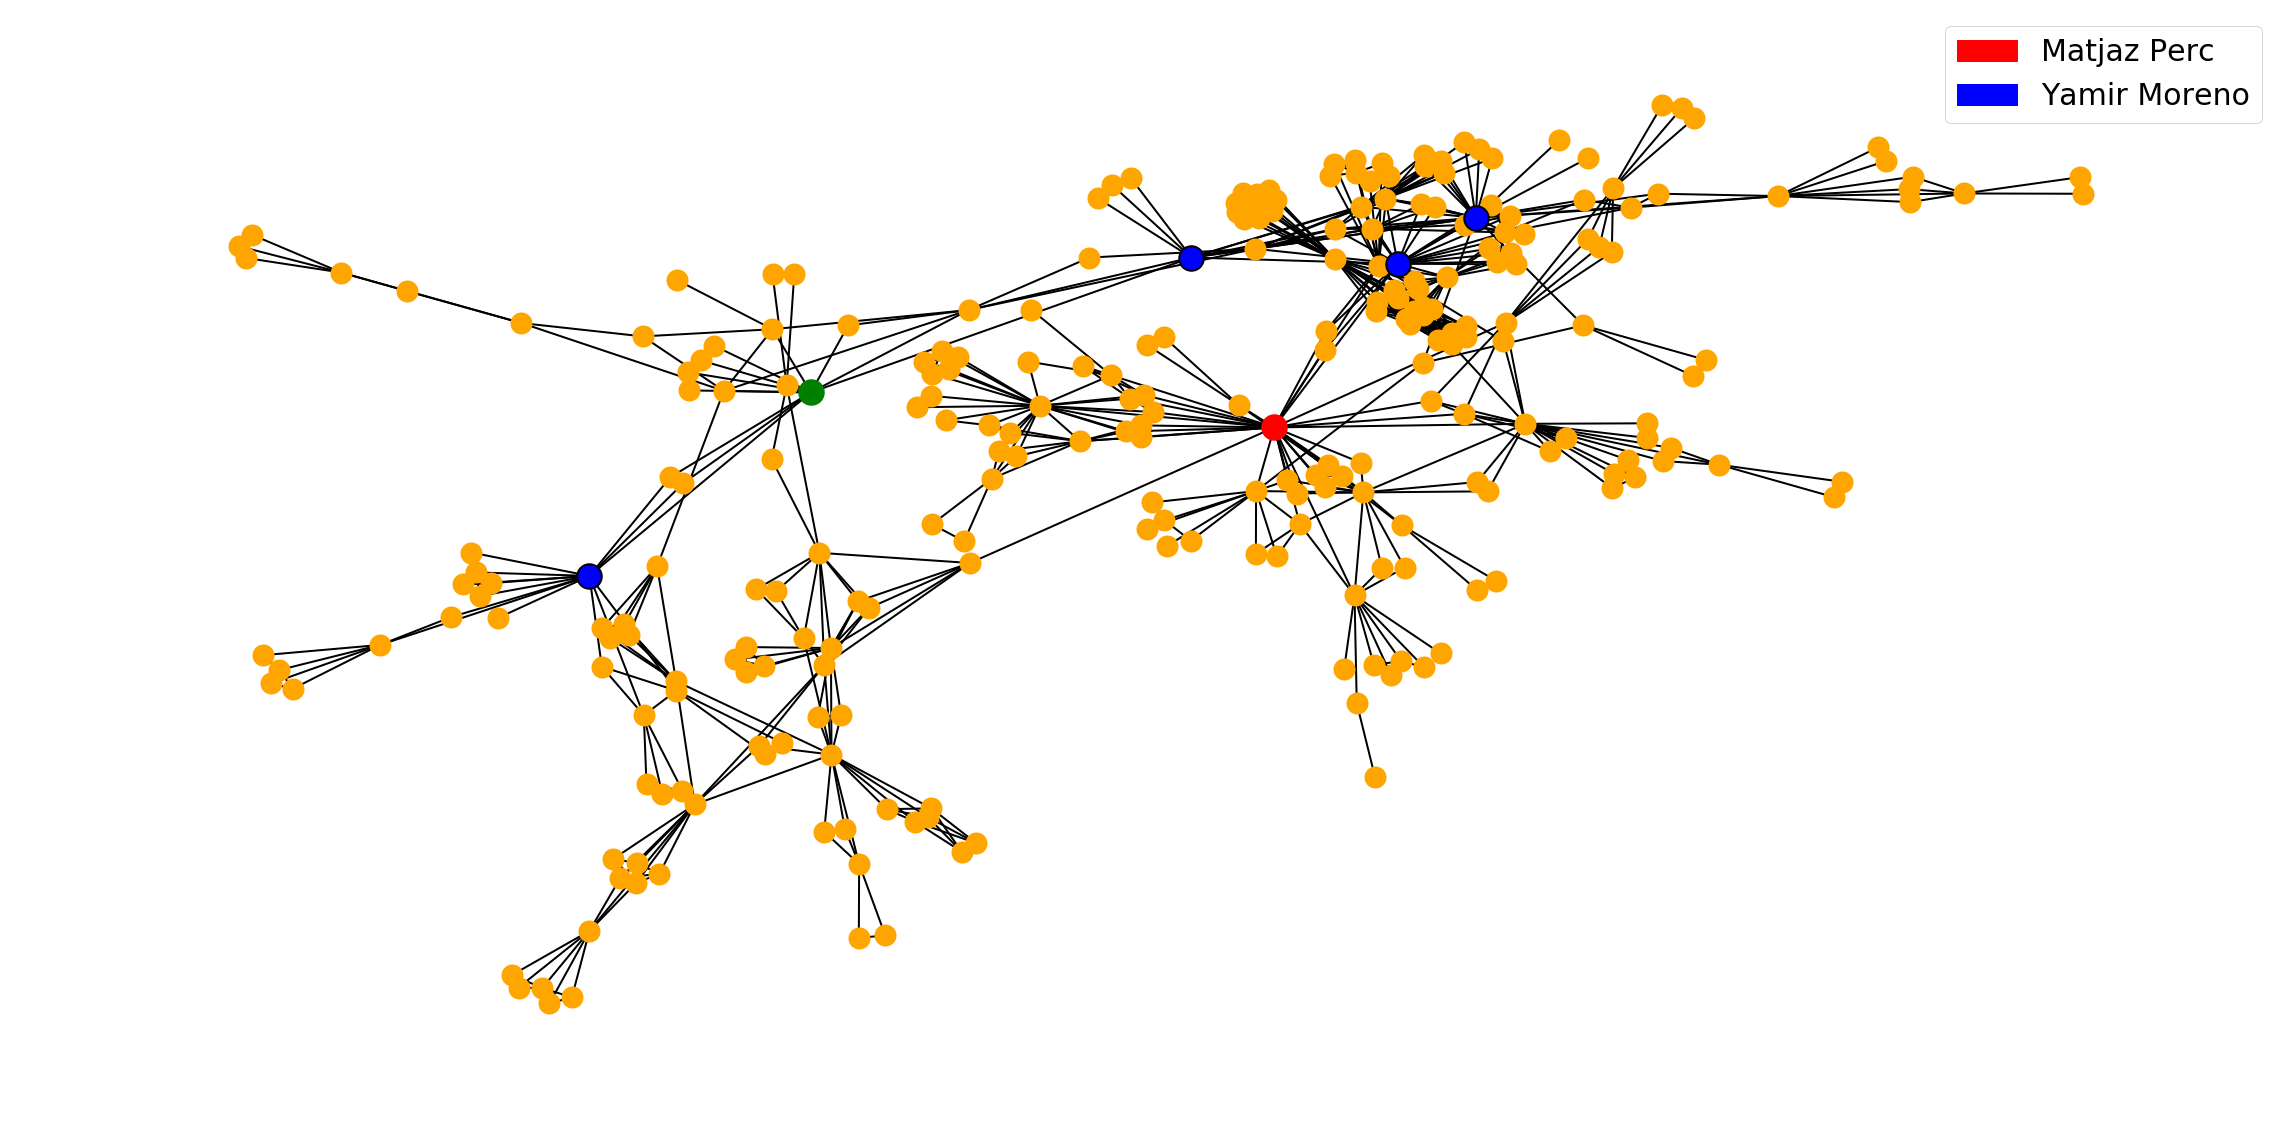

In [29]:
fig, ax = plt.subplots(figsize=(40, 20))
pos = nx.spring_layout(D)
nodes = nx.draw_networkx_nodes(D, pos, linewidths=2, node_color='orange', node_size=400)
nodes = nx.draw_networkx_nodes(D, pos, nodelist=['martin a. nowak'], linewidths=2, node_color='green', node_size=600)
nodes = nx.draw_networkx_nodes(D, pos, nodelist=['matjaz perc'], linewidths=2, node_color='red', node_size=600)

nodes = nx.draw_networkx_nodes(D, pos, nodelist=['yamir moreno', 'arne traulsen',
                                                 'angel sánchez', 'krishnendu chatterjee'], linewidths=2, node_color='blue', node_size=600)

nodes.set_edgecolor('black'); nx.draw_networkx_edges(D, pos, width=2)
# nx.draw_networkx_labels(D, pos, labels)
limits=plt.axis('off')

red_patch = mpatches.Patch(color='red', label='Matjaz Perc')
green_patch = mpatches.Patch(color='green', label='Martin A. Nowak')
green_patch = mpatches.Patch(color='blue', label='Yamir Moreno')
plt.legend(handles=[red_patch, green_patch], fontsize=30);

# h = []
# for name in labels:
#     h.append(lines.Line2D([], [], marker='$' + str(labels[name]) + '$', markersize=8, 
#                           label=name.title(), linewidth=0, color='darkorange'))
#     ax.legend(handles=h, fontsize=20, bbox_to_anchor=(0, 1), prop=legend_properties)

#plt.savefig('/home/nightwing/rsc/Literature-Article/assets/images/Perc.pdf')

Analyse cliques
-----------------

**Centrality.**

In [30]:
nx.density(D), float(2 * D.size() / D.order())

(0.02088239466591006, 5.533834586466165)

In [33]:
betweeness_unweighted = sorted(nx.betweenness_centrality(D).items(), 
                               key=lambda x:x[1], reverse=True)[0:10]
betweeness_unweighted = pd.DataFrame(betweeness_unweighted, columns=['Author name', 'Betweenness Centrality'])
betweeness_unweighted = betweeness_unweighted.sort_values('Betweenness Centrality', ascending=False)
betweeness_unweighted['Author name'] = [name.title() for name in betweeness_unweighted['Author name']]

In [34]:
closeness_unweighted = sorted(nx.closeness_centrality(D).items(), 
                               key=lambda x:x[1], reverse=True)[0:10]
closeness_unweighted = pd.DataFrame(closeness_unweighted, columns=['Author name', 'Closeness Centrality'])
closeness_unweighted = closeness_unweighted.sort_values('Closeness Centrality', ascending=False)
closeness_unweighted['Author name'] = [name.title() for name in closeness_unweighted['Author name']]

In [ ]:
page_rank_unweighted = sorted(nx.pagerank_numpy(D).items(), 
                               key=lambda x:x[1], reverse=True)[0:10]
page_rank_unweighted = pd.DataFrame(page_rank_unweighted, columns=['Author name', 'Page rank Centrality'])
page_rank_unweighted = page_rank_unweighted.sort_values('Page rank Centrality', ascending=False)
page_rank_unweighted['Author name'] = [name.title() for name in page_rank_unweighted['Author name']]

In [ ]:
# for centrality, label in zip([betweeness, page_rank, closeness_rank],
#                              ['betweness', 'page_rank', 'closeness']):
#     file = open("/home/nightwing/rsc/Literature-Article/assets/subgraph_centrality_{}.tex".format(label),
#                 'w')
#     file.write('{}'.format(pd.DataFrame(centrality).to_latex()))
#     file.close()

**Shortest paths.**

In [38]:
length = nx.single_source_shortest_path_length(D, 'matjaz perc')
np.mean(list(length.values()))

3.0225563909774436

In [39]:
length = nx.single_source_shortest_path_length(D, 'martin a. nowak')
np.mean(list(length.values()))

4.0451127819548871

In [40]:
nx.shortest_path(D, 'martin a. nowak', 'matjaz perc')

['martin a. nowak', 'arne traulsen', 'yamir moreno', 'matjaz perc']